<a href="https://colab.research.google.com/github/Jovin-Joy4121/AI-ML-Elevate-Tasks-Day-/blob/main/Copy_of_Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Titanic-Dataset.csv to Titanic-Dataset.csv

📝 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

🔍 Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0


/tmp/ipython-input-1-2109031849.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1-2109031849.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

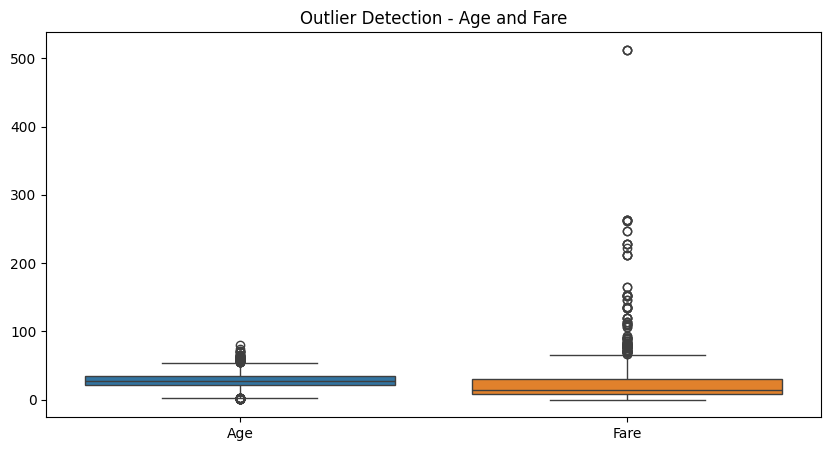


✅ Cleaned Data Sample:

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.608518      1      0 -0.748128       False   
2         1       3    1 -0.209117      0      0 -0.698326       False   
3         1       1    1  0.689534      1      0  2.634730       False   
4         0       3    0  0.689534      0      0 -0.689103       False   
5         0       3    0 -0.009417      0      0 -0.658978        True   

   Embarked_S  
0        True  
2        True  
3        True  
4        True  
5       False  


/tmp/ipython-input-1-2109031849.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 🚢 Titanic Data Cleaning & Preprocessing - Google Colab Compatible

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import files
import io

# 🔽 Upload Titanic Dataset
uploaded = files.upload()

# Read the uploaded CSV file (adjust filename if different)
df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']))

# Basic info
print("\n📝 Dataset Info:")
print(df.info())
print("\n🔍 Missing Values:\n", df.isnull().sum())

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

# Encode categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop irrelevant features
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Boxplot before removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Outlier Detection - Age and Fare")
plt.show()

# Remove outliers using IQR
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Standardize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Preview final data
print("\n✅ Cleaned Data Sample:\n")
print(df.head())

# Save cleaned CSV for download
df.to_csv("titanic_cleaned.csv", index=False)
files.download("titanic_cleaned.csv")
